## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('Resources/bitstamp.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase =  pd.read_csv(
    Path('Resources/coinbase.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $

bitstamp["Close"] = bitstamp["Close"].str.strip("$")

### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp["Close"] = bitstamp["Close"].astype("float")

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
if (bitstamp.duplicated().sum() > 0):
    bitstamp = bitstamp.drop_duplicates()



### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase = coinbase.dropna()
coinbase["Close"] = coinbase["Close"].str.strip("$").astype("float")
if coinbase.duplicated().sum() > 0:
    coinbase = coinbase.drop_duplicates()


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [11]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame

bitstamp_sliced = bitstamp.loc["2018-01-24":"2018-01-31","Close"]
#bitstamp_sliced = bitstamp.loc[:,"Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-24 00:01:00    10727.31
2018-01-24 00:02:00    10759.58
2018-01-24 00:03:00    10763.84
2018-01-24 00:04:00    10700.00
2018-01-24 00:05:00    10660.00
Name: Close, dtype: float64

In [12]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc["2018-01-24":"2018-01-31", "Close"]
#coinbase_sliced = coinbase.loc[:, "Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-24 00:00:00    10670.00
2018-01-24 00:01:00    10720.40
2018-01-24 00:02:00    10747.75
2018-01-24 00:03:00    10756.01
2018-01-24 00:04:00    10710.00
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [13]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    11467.000000
mean     10998.795297
std        555.440806
min       9519.010000
25%      10794.925000
50%      11150.970000
75%      11393.170000
max      11982.000000
Name: Close, dtype: float64

In [14]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    11520.000000
mean     10928.822787
std        500.846115
min       9602.010000
25%      10795.010000
50%      11083.710000
75%      11290.002500
max      11694.980000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Week of 2018-20-02'}, xlabel='Timestamp'>

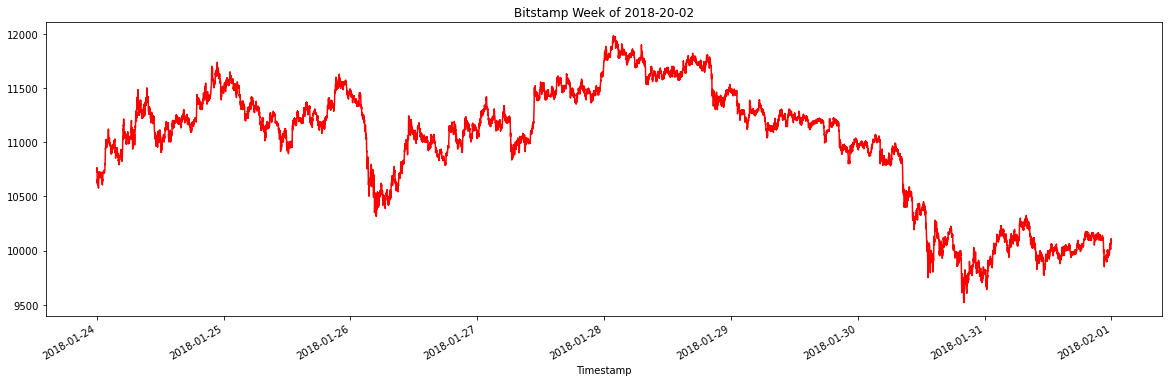

In [21]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(20,6), title="Bitstamp Week of 2018-20-02", color="red")

<AxesSubplot:title={'center':'Bitstamp Week of 2018-20-02'}, xlabel='Timestamp'>

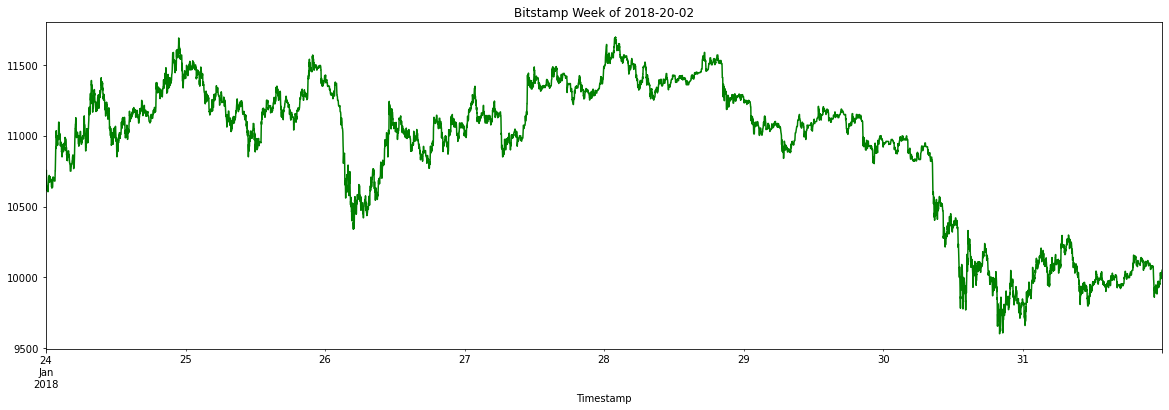

In [22]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(20,6), title="Bitstamp Week of 2018-20-02", color="green")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase - Last week of Jan 2018'}, xlabel='Timestamp'>

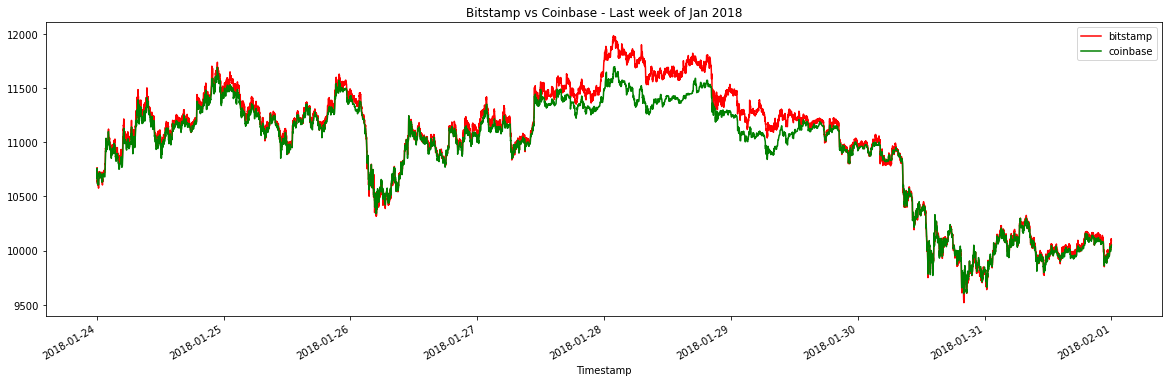

In [36]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(figsize=(20,6), title="Bitstamp vs Coinbase - Last week of Jan 2018", color="red", legend=True, label="bitstamp")
coinbase_sliced.plot(figsize=(20,6), color="green", legend=True, label="coinbase")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase - Jan 2018'}, xlabel='Timestamp'>

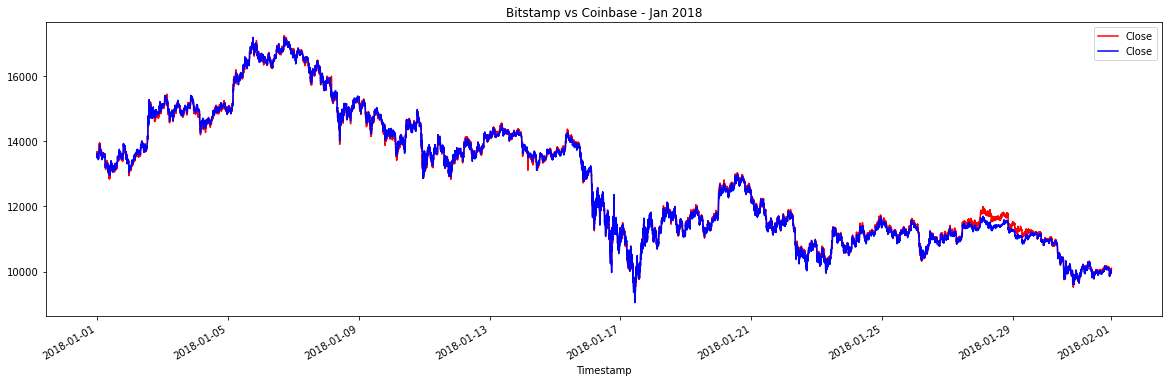

In [24]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].loc["2018-01-01":"2018-01-31"].plot(legend=True,figsize=(20,6), title="Bitstamp vs Coinbase - Jan 2018", color="red", label="bitstamp"), 
coinbase['Close'].loc["2018-01-01":"2018-01-31"].plot(legend=True,figsize=(20,6), color="blue", label="coinbase")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase - Feb 2018'}, xlabel='Timestamp'>

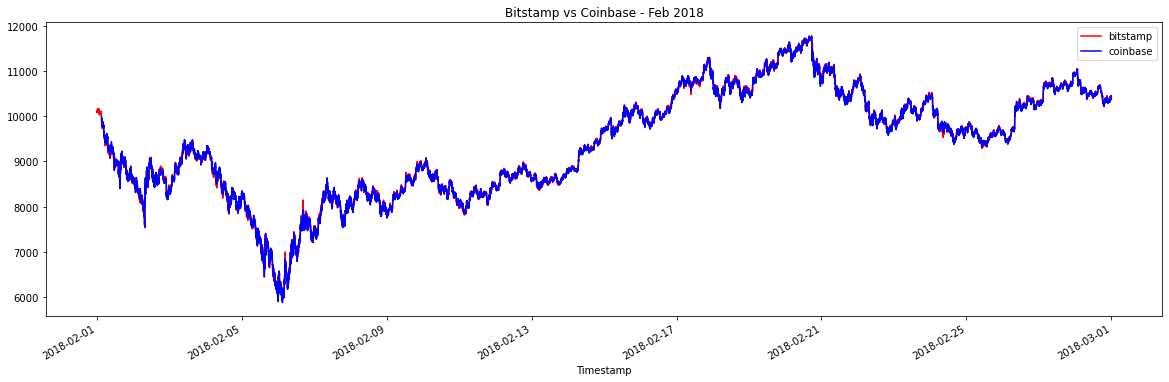

In [35]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp['Close'].loc["2018-02-01":"2018-02-28"].plot(legend=True,figsize=(20,6), title="Bitstamp vs Coinbase - Feb 2018", color="red", label="bitstamp"), 
coinbase['Close'].loc["2018-02-01":"2018-02-28"].plot(legend=True,figsize=(20,6), color="blue", label="coinbase")



**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** No

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp vs Coinbase - Feb 2018'}, xlabel='Timestamp'>

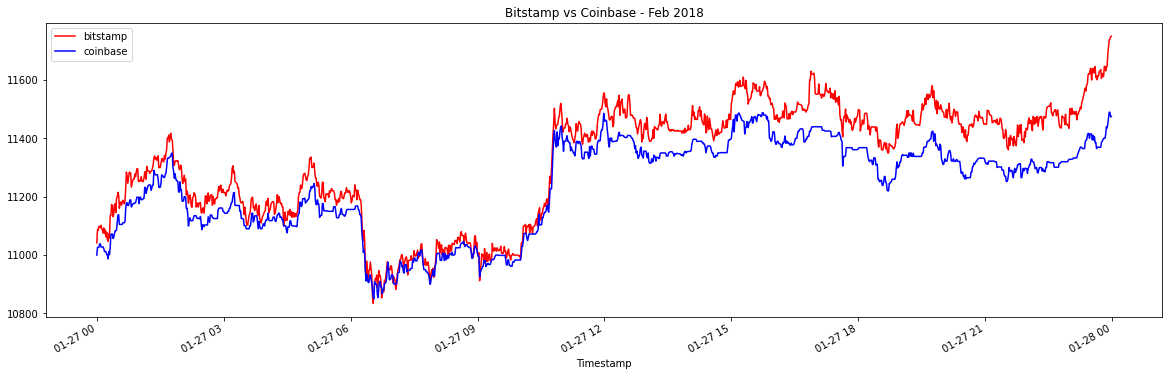

In [40]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc["2018-01-27":"2018-01-27"].plot(legend=True,figsize=(20,6), title="Bitstamp vs Coinbase - 1/27/2018", color="red", label="bitstamp"), 
coinbase['Close'].loc["2018-01-27":"2018-01-27"].plot(legend=True,figsize=(20,6), color="blue", label="coinbase")

In [53]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_early = bitstamp['Close'].loc["2018-01-27"] - coinbase['Close'].loc["2018-01-27"]

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1421.000000
mean       84.558600
std        51.823073
min       -35.950000
25%        47.430000
50%        75.940000
75%       116.180000
max       275.380000
Name: Close, dtype: float64

<AxesSubplot:>

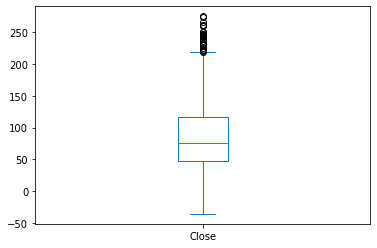

In [56]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

<AxesSubplot:title={'center':'Bitstamp vs Coinbase - 1/27/2018'}, xlabel='Timestamp'>

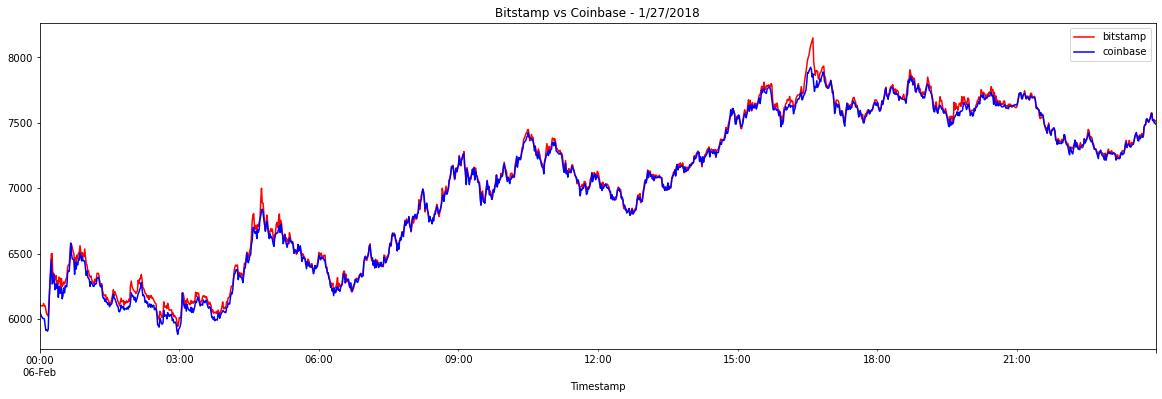

In [60]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc["2018-02-06":"2018-02-06"].plot(legend=True,figsize=(20,6), title="Bitstamp vs Coinbase - 2/06/2018", color="red", label="bitstamp"), 
coinbase['Close'].loc["2018-02-06":"2018-02-06"].plot(legend=True,figsize=(20,6), color="blue", label="coinbase")

In [62]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp['Close'].loc["2018-02-06":"2018-02-06"] - coinbase['Close'].loc["2018-02-06":"2018-02-06"]

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean       23.841236
std        30.390321
min       -51.000000
25%         4.675000
50%        19.375000
75%        37.877500
max       280.010000
Name: Close, dtype: float64

<AxesSubplot:>

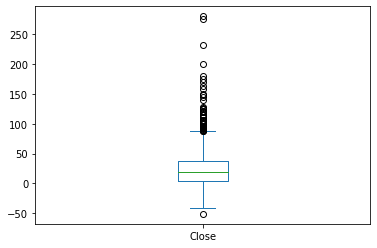

In [64]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'Bitstamp vs Coinbase - 3/05/2018'}, xlabel='Timestamp'>

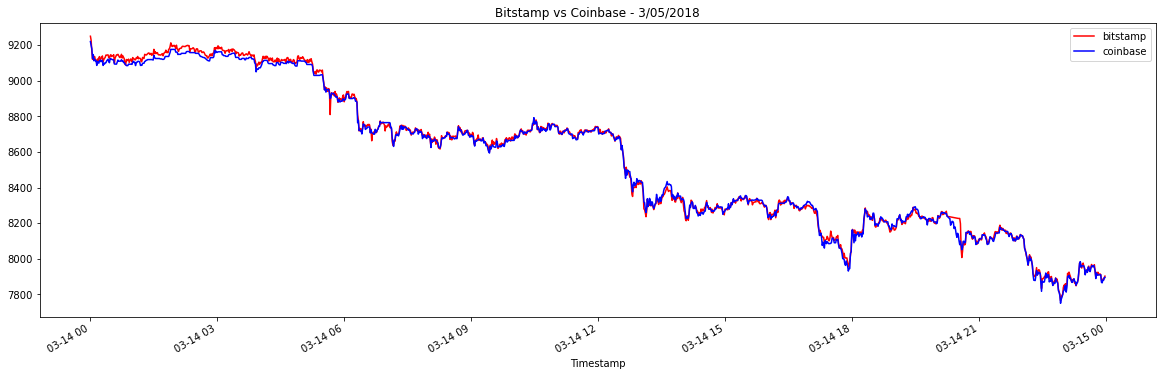

In [87]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc["2018-03-14":"2018-03-14"].plot(legend=True,figsize=(20,6), title="Bitstamp vs Coinbase - 3/14/2018", color="red", label="bitstamp"), 
coinbase['Close'].loc["2018-03-14":"2018-03-14"].plot(legend=True,figsize=(20,6), color="blue", label="coinbase")

In [68]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp['Close'].loc["2018-03-14":"2018-03-14"] - coinbase['Close'].loc["2018-03-14":"2018-03-14"]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1437.000000
mean       11.817683
std        14.276780
min       -33.180000
25%         2.940000
50%        11.500000
75%        20.470000
max        68.280000
Name: Close, dtype: float64

<AxesSubplot:>

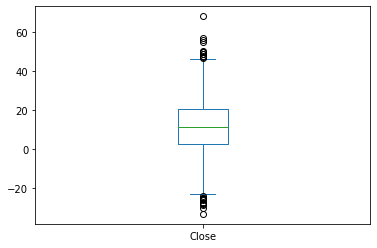

In [69]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [88]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp['Close'].loc["2018-01-27"] - coinbase['Close'].loc["2018-01-27"]
arbitrage_spread_middle = bitstamp['Close'].loc["2018-02-06":"2018-02-06"] - coinbase['Close'].loc["2018-02-06":"2018-02-06"]
arbitrage_spread_late = bitstamp['Close'].loc["2018-03-14":"2018-03-14"] - coinbase['Close'].loc["2018-03-14":"2018-03-14"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
display(arbitrage_spread_early.describe())
display(arbitrage_spread_middle.describe())
display(arbitrage_spread_late.describe())

count    1421.000000
mean       84.558600
std        51.823073
min       -35.950000
25%        47.430000
50%        75.940000
75%       116.180000
max       275.380000
Name: Close, dtype: float64

count    1440.000000
mean       23.841236
std        30.390321
min       -51.000000
25%         4.675000
50%        19.375000
75%        37.877500
max       280.010000
Name: Close, dtype: float64

count    1425.000000
mean        6.731404
std        16.322187
min       -90.010000
25%        -2.910000
50%         6.000000
75%        16.600000
max       147.650000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [89]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
#spread_return = arbitrage_spread[arbitrage_spread>0] / bitcoin_1['Close'].loc['2015-10-19']

spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp['Close'].loc["2018-01-27"]
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp['Close'].loc["2018-02-06"]
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp['Close'].loc["2018-03-14"]


# Review the spread return DataFrame
display(spread_return_early)
display(spread_return_middle)
display(spread_return_late)


Timestamp
2018-01-27 00:00:00    0.003759
2018-01-27 00:01:00    0.005512
2018-01-27 00:02:00    0.005295
2018-01-27 00:03:00    0.006487
2018-01-27 00:04:00    0.005286
                         ...   
2018-01-27 23:55:00    0.020694
2018-01-27 23:56:00    0.021128
2018-01-27 23:57:00    0.021380
2018-01-27 23:58:00    0.023295
2018-01-27 23:59:00    0.023437
Name: Close, Length: 1421, dtype: float64

Timestamp
2018-02-06 00:00:00    0.009983
2018-02-06 00:01:00    0.009852
2018-02-06 00:02:00    0.012449
2018-02-06 00:03:00    0.013933
2018-02-06 00:04:00    0.015752
                         ...   
2018-02-06 23:55:00         NaN
2018-02-06 23:56:00         NaN
2018-02-06 23:57:00    0.003260
2018-02-06 23:58:00    0.001534
2018-02-06 23:59:00    0.003147
Name: Close, Length: 1440, dtype: float64

Timestamp
2018-03-14 00:00:00    0.003243
2018-03-14 00:01:00    0.003117
2018-03-14 00:02:00         NaN
2018-03-14 00:03:00         NaN
2018-03-14 00:04:00         NaN
                         ...   
2018-03-14 23:55:00    0.001115
2018-03-14 23:56:00    0.000893
2018-03-14 23:57:00    0.000288
2018-03-14 23:58:00         NaN
2018-03-14 23:59:00    0.000954
Name: Close, Length: 1425, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [90]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
display(profitable_trades_early)
display(profitable_trades_middle)
display(profitable_trades_late)

Timestamp
2018-01-27 03:12:00    0.010266
2018-01-27 12:16:00    0.010240
2018-01-27 12:17:00    0.010167
2018-01-27 12:18:00    0.011166
2018-01-27 12:19:00    0.011276
                         ...   
2018-01-27 23:55:00    0.020694
2018-01-27 23:56:00    0.021128
2018-01-27 23:57:00    0.021380
2018-01-27 23:58:00    0.023295
2018-01-27 23:59:00    0.023437
Name: Close, Length: 372, dtype: float64

Timestamp
2018-02-06 00:02:00    0.012449
2018-02-06 00:03:00    0.013933
2018-02-06 00:04:00    0.015752
2018-02-06 00:05:00    0.018794
2018-02-06 00:06:00    0.016411
                         ...   
2018-02-06 17:05:00    0.010585
2018-02-06 19:39:00    0.015566
2018-02-06 19:41:00    0.012093
2018-02-06 19:46:00    0.012391
2018-02-06 19:49:00    0.014356
Name: Close, Length: 109, dtype: float64

Timestamp
2018-03-14 20:31:00    0.011170
2018-03-14 20:32:00    0.015271
2018-03-14 20:33:00    0.017948
2018-03-14 20:34:00    0.011860
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [91]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()
profitable_trades_middle.describe()
profitable_trades_late.describe()

count    4.000000
mean     0.014062
std      0.003150
min      0.011170
25%      0.011688
50%      0.013566
75%      0.015940
max      0.017948
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [95]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp['Close'].loc["2018-01-27"]
profit_middle = profitable_trades_middle * bitstamp['Close'].loc["2018-02-06"]
profit_late = profitable_trades_late * bitstamp['Close'].loc["2018-03-14"]

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_late = profit_late.dropna()


# View the early profit DataFrame
display(profit_per_trade_early)
display(profit_per_trade_middle)
display(profit_per_trade_late)

Timestamp
2018-01-27 03:12:00    115.97
2018-01-27 12:16:00    117.84
2018-01-27 12:17:00    117.00
2018-01-27 12:18:00    128.63
2018-01-27 12:19:00    130.01
                        ...  
2018-01-27 23:55:00    242.38
2018-01-27 23:56:00    248.00
2018-01-27 23:57:00    251.00
2018-01-27 23:58:00    273.68
2018-01-27 23:59:00    275.38
Name: Close, Length: 372, dtype: float64

Timestamp
2018-02-06 00:02:00     75.95
2018-02-06 00:03:00     84.99
2018-02-06 00:04:00     96.09
2018-02-06 00:05:00    115.00
2018-02-06 00:06:00    100.11
                        ...  
2018-02-06 17:05:00     81.00
2018-02-06 19:39:00    119.18
2018-02-06 19:41:00     92.51
2018-02-06 19:46:00     94.79
2018-02-06 19:49:00    110.55
Name: Close, Length: 109, dtype: float64

Timestamp
2018-03-14 20:31:00     91.89
2018-03-14 20:32:00    125.63
2018-03-14 20:33:00    147.65
2018-03-14 20:34:00     97.22
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [96]:
# Generate the summary statistics for the early profit per trade DataFrame
display(profit_per_trade_early.describe())
display(profit_per_trade_middle.describe())
display(profit_per_trade_late.describe())

count    372.000000
mean     153.419032
std       33.545310
min      114.220000
25%      128.857500
50%      145.385000
75%      168.472500
max      275.380000
Name: Close, dtype: float64

count    109.000000
mean      95.182202
std       41.231214
min       61.690000
25%       68.220000
50%       80.330000
75%      106.970000
max      280.010000
Name: Close, dtype: float64

count      4.000000
mean     115.597500
std       25.998666
min       91.890000
25%       95.887500
50%      111.425000
75%      131.135000
max      147.650000
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

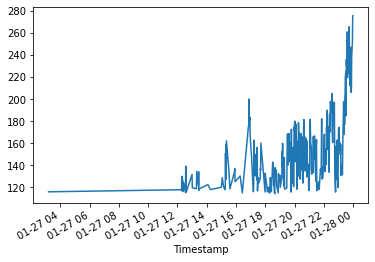

In [100]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot()


#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [106]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
print("Early:" , profit_per_trade_early.sum())
print("Middle:" , profit_per_trade_middle.sum())
print("Late:" , profit_per_trade_late.sum())



Early: 57071.87999999999
Middle: 10374.859999999993
Late: 462.3899999999976


#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [109]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:xlabel='Timestamp'>

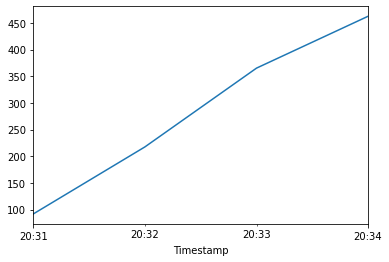

In [112]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
#cumulative_profit_early.plot()
#cumulative_profit_middle.plot()
cumulative_profit_late.plot()

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** It seems like arbing was harder in as time went on. In January there were more gaps then in March.